<a href="https://colab.research.google.com/github/MartinPSE/StandAloneDL/blob/master/Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Batch Gradient Descent / Stochastic Gradient Descent
---
$$θ = θ - ŋ𝚫J(θ)$$
θ : Parameter set of the model ŋ : Learning rate J(θ) : Loss function <br>

한 번 Step을 밟을 때, 모든 Data에서 Gradient를 계산하고 --> 다음 Step을 밟는다. <br>
✈ RAM의 한계에 따라, Training Data의 양이 적어진다. <br>
✈ 시간이 오래걸린다 --> Training 이 오래걸린다.

### Stochastic Gradient Descent (SGD)
---
  작은 덩어리를 보고 (mini-batch)에 대해서만 Gradient를 계산하고 Step --> 즉 표본을 뽑는 느낌이다. <br>
  ✈ Stochastic ? 확률적으로 결과가 나오는, 그리고 또한 Depending on mini batch <br>
  ✈ Batch Gradient Descent 보다 빠르다.  <br>
  ✈ Local Minimum을 빠져나갈 수가 없어.

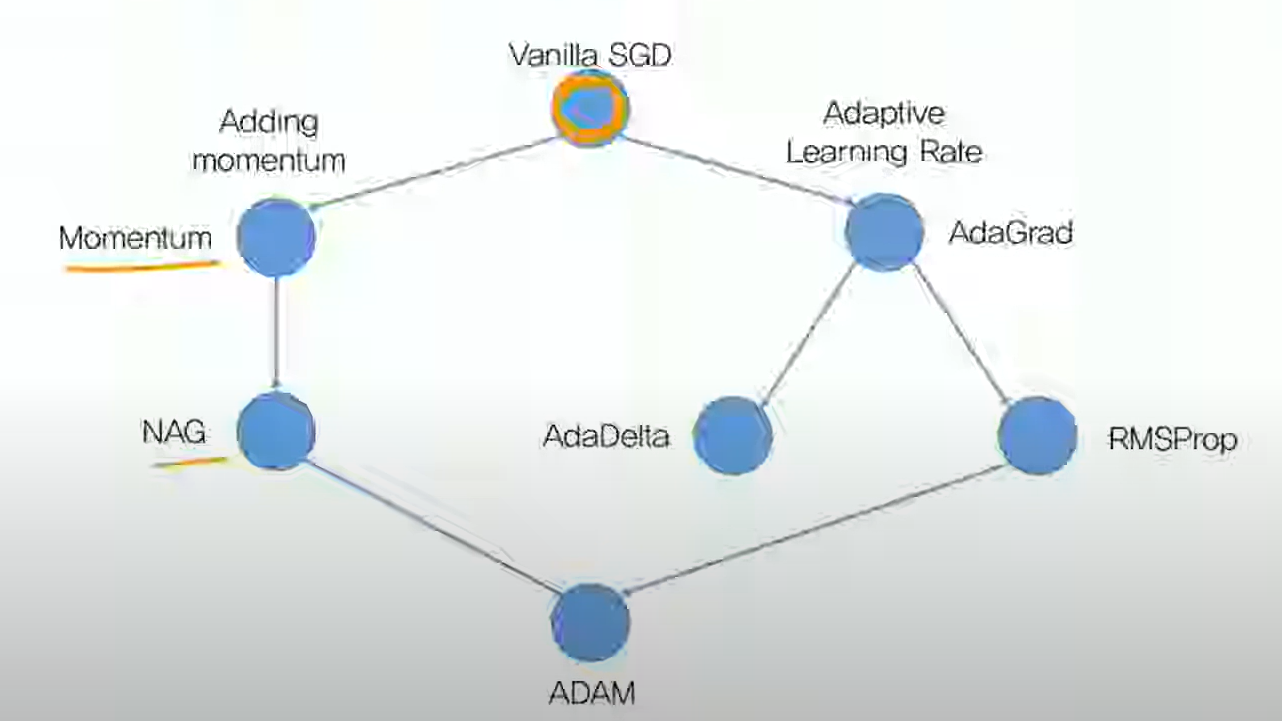

### Local Minimum 에서 나오기 위해 <font color=red:>Momentum</font>
---
$$ θ = θ - V_t$$
$$ V_t = 𝛾 V_{t-1} + ŋ \nabla_θ J(θ)$$
  ℽ = 0 ~ 1 사이의 값 <br>
  전체 Gradient 를 가지고 계산 <br>
  
  불필요한 Step을 줄여준다. <br>

  But) <br>
  Global Minumum에 도착해도 관성때문에, 불필요한 움직임이 생긴다. <br>
  그래서 나온 NAG ( Nestrov Accelerated Gradient )
$$ θ = θ - V_t$$
$$ V_t = 𝛾 V_(t-1) + ŋ \nabla_θ J(θ - 𝛾V_{t-1})$$ 
  

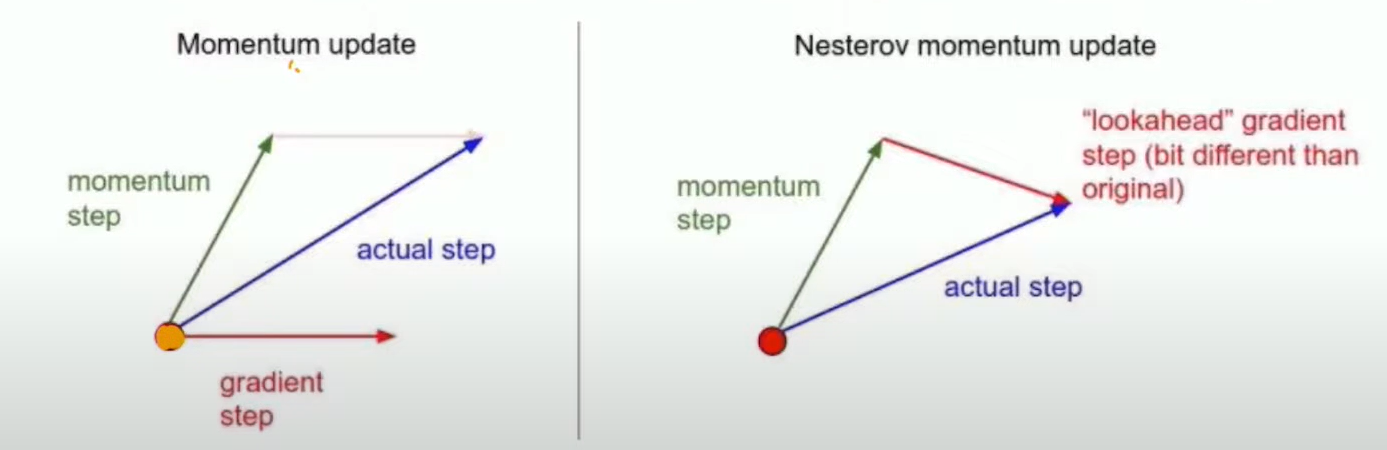

### Problem of SGD
----
  Step size 가 Parameter 마다 다 동일하다. 다른 Gradient에도 동일한 값이 곱해진다 <br>
  그래서 Learning Rate를 다르게 곱해준다. <br>

  Adaptive Gradient(Adagrad)
$$θ_{t+1} = θ - {ŋ  \over \sqrt{G_t + ϵ}}·∇_θ J(θ_t)$$
$$G_t = G_{t-1} + (∇_θ J(θ_t))^2$$

G 가 무한대로 발산하는 경우가 생긴다. --> 해결책  <br> <font color=red>**RMSprop** </font>

$$θ_{t+1} = θ - {ŋ  \over \sqrt{G_t + ϵ}}·∇_θ J(θ_t)$$
$$G_t = \gamma   G_{t-1} + (1-\gamma)(∇_θ J(θ_t))^2$$

<font color='red'>AdaDelta </font> <br>
G만 고려하던걸 S를 같이 고려했다. 

$$θ_{t+1} = θ_t - Δ_θ$$
$$Δ_θ =  {\sqrt{s + ϵ}   \over \sqrt{G + ϵ}} ⋅ ∇_θ J(θ_t)$$
$$S_{t+1} = ℽ S_t + (1 - ℽ) Δ_θ$$
$$ G_{t+1} = ℽG_t + (1-ℽ)(∇_θ J(θ_t))^2$$

최종보스 <font color='red'> ADAM </font> (Adaptive Moment Estimation)

$$ \mathsf {Momentum} $$
$$ m_t = β_1 m_{t-1} + (1-β_1) g_t$$ 

$$ \mathsf {Adaptive Learning Rate} $$
$$ V_t = β_2 v_{t-1} + (1-β_2) g_t^2$$

$$ m̂ = { m_t \over 1-B^t_1}  \qquad v̂ = { v_t \over 1-B^t_2} $$

$$ θ_{t+1} = θ_t - { ŋ \over \sqrt{v̂_t + ϵ}} m̂_t$$

### How to use Advanced Optimizers in Pytorch


In [ ]:
# Optimizer 에 Option 값에 따라서, 뒤에 Option 값만 달라짐
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr= 0.01, momentum = 0.9)

